In [2]:
# Import necessary libraries
import pandas as pd  # For data handling
import numpy as np   # For numerical computations

# Load the dataset (Ensure heart.csv is in the same folder)
df = pd.read_csv("heart.csv")

# Display first few rows
df.head()


Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [3]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Copy dataset for KNN
df_knn = df.copy()

# Step 2: Encode categorical variables
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
df_knn = pd.get_dummies(df_knn, columns=categorical_features, drop_first=True)

# Step 3: Define Features (X) and Target (y)
X = df_knn.drop(columns=['HeartDisease'])  # Features
y = df_knn['HeartDisease']  # Target variable

# Step 4: Train-Test Split (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 5: Normalize Numerical Data (StandardScaler)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("✅ Data Preprocessing Completed for KNN!")


✅ Data Preprocessing Completed for KNN!


In [4]:
# Step 6: Train KNN Model (Default K=5)
knn_model = KNeighborsClassifier(n_neighbors=5, algorithm='auto')  
knn_model.fit(X_train, y_train)

# Step 7: Predict & Evaluate Model
y_pred_knn = knn_model.predict(X_test)

# Step 8: Display Model Performance
print("🔹 KNN Model Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred_knn))
print("\n🔹 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


🔹 KNN Model Accuracy: 0.8858695652173914

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.85      0.87        82
           1       0.89      0.91      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184


🔹 Confusion Matrix:
 [[70 12]
 [ 9 93]]


In [5]:
from sklearn.model_selection import GridSearchCV

# Step 9: Define parameter grid for K
param_grid = {'n_neighbors': range(1, 21)}  # Testing values from 1 to 20

# Step 10: Perform Grid Search
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Step 11: Best `K` value
print("✅ Best K:", grid_search.best_params_['n_neighbors'])

# Step 12: Train with best K
best_knn = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'])
best_knn.fit(X_train, y_train)

# Step 13: Evaluate best model
y_pred_best_knn = best_knn.predict(X_test)
print("🔹 Improved KNN Accuracy:", accuracy_score(y_test, y_pred_best_knn))


✅ Best K: 19
🔹 Improved KNN Accuracy: 0.9021739130434783


In [6]:
pip install tensorflow keras


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
# Import required libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Copy dataset for Deep Learning
df_dl = df.copy()

# Step 2: Encode categorical variables
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
df_dl = pd.get_dummies(df_dl, columns=categorical_features, drop_first=True)

# Step 3: Define Features (X) and Target (y)
X = df_dl.drop(columns=['HeartDisease'])  # Features
y = df_dl['HeartDisease']  # Target variable

# Step 4: Train-Test Split (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 5: Normalize Data (Neural Networks require scaled data)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert y to TensorFlow Tensors
y_train = np.array(y_train)
y_test = np.array(y_test)

print("✅ Data Preprocessing Completed for Deep Learning!")


✅ Data Preprocessing Completed for Deep Learning!


In [8]:
# Step 6: Define Neural Network Model
model = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),  # Input Layer
    keras.layers.Dropout(0.3),  # Dropout to prevent overfitting
    keras.layers.Dense(16, activation='relu'),  # Hidden Layer
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid')  # Output Layer for Binary Classification
])

# Step 7: Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 8: Train the Model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=16)

# Step 9: Evaluate Model Performance
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\n🔹 Deep Learning Model Accuracy: {test_acc * 100:.2f}%")


c:\Users\poluk\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5388 - loss: 0.7601 - val_accuracy: 0.7120 - val_loss: 0.5951
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6313 - loss: 0.6121 - val_accuracy: 0.8478 - val_loss: 0.4993
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7374 - loss: 0.5201 - val_accuracy: 0.8478 - val_loss: 0.4265
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8058 - loss: 0.4753 - val_accuracy: 0.8641 - val_loss: 0.3837
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8207 - loss: 0.4283 - val_accuracy: 0.8804 - val_loss: 0.3545
Epoch 6/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8188 - loss: 0.4182 - val_accuracy: 0.8804 - val_loss: 0.3413
Epoch 7/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8425 - loss: 0.3952 - val_accuracy: 0.8859 - val_loss: 0.3317
Epoch 8/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8429 - loss: 0.3732 - val_accuracy: 0.8804 - val_loss:

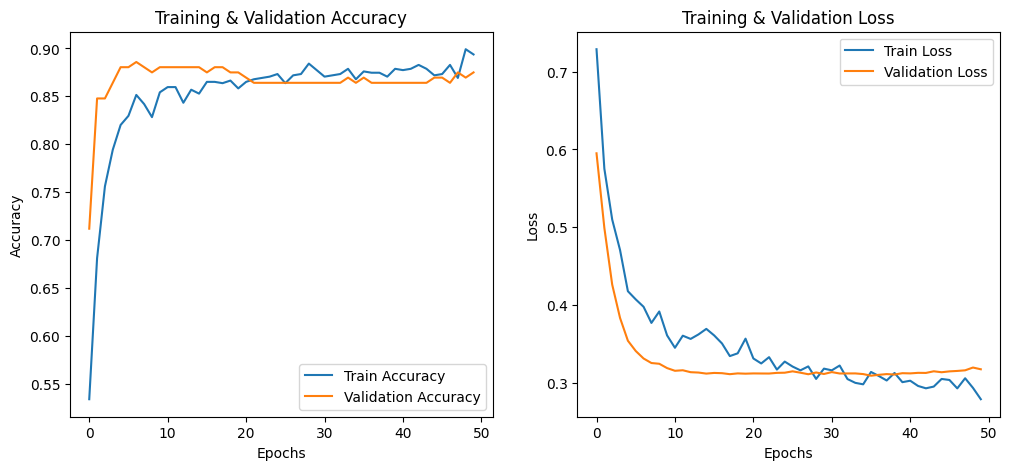

In [9]:
import matplotlib.pyplot as plt

# Step 10: Plot Accuracy & Loss
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training & Validation Loss')

plt.show()
